In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')

df.info

<bound method DataFrame.info of         Unnamed: 0          id  \
0           362773  7307679724   
1           362712  7311833696   
2           362722  7311441996   
3           362771  7307680715   
4           362710  7311834578   
...            ...         ...   
426875      303849  7307070484   
426876      303706  7314635557   
426877      303704  7314710341   
426878      303670  7316225330   
426879      303836  7308192431   

                                                      url  \
0       https://abilene.craigslist.org/ctd/d/abilene-2...   
1       https://abilene.craigslist.org/ctd/d/abilene-2...   
2       https://abilene.craigslist.org/ctd/d/abilene-2...   
3       https://abilene.craigslist.org/ctd/d/abilene-2...   
4       https://abilene.craigslist.org/ctd/d/abilene-2...   
...                                                   ...   
426875  https://zanesville.craigslist.org/cto/d/zanesv...   
426876  https://zanesville.craigslist.org/cto/d/zanesv...   
426877  ht

**Handling missing values**

In [5]:
from pprint import pprint
from random import choice
# df.drive.fillna("awd",inplace=True)
# df.drive.value_counts(dropna=False)

cols = df.columns

for col in cols:
    if df[col].mode().count()>0:
     df[col].fillna(df[col].mode().iloc[0],inplace=True)
    else:
     df[col].fillna(choice(df[col]),inplace=True)

df.drop("county",inplace=True,axis=1)
df["posting_date"]= pd.to_datetime(df["posting_date"])
df["removal_date"] = pd.to_datetime(df["removal_date"])



**Set posting date as index**

In [6]:
df.set_index("posting_date",inplace=True)

**Plotting a scatter chart**

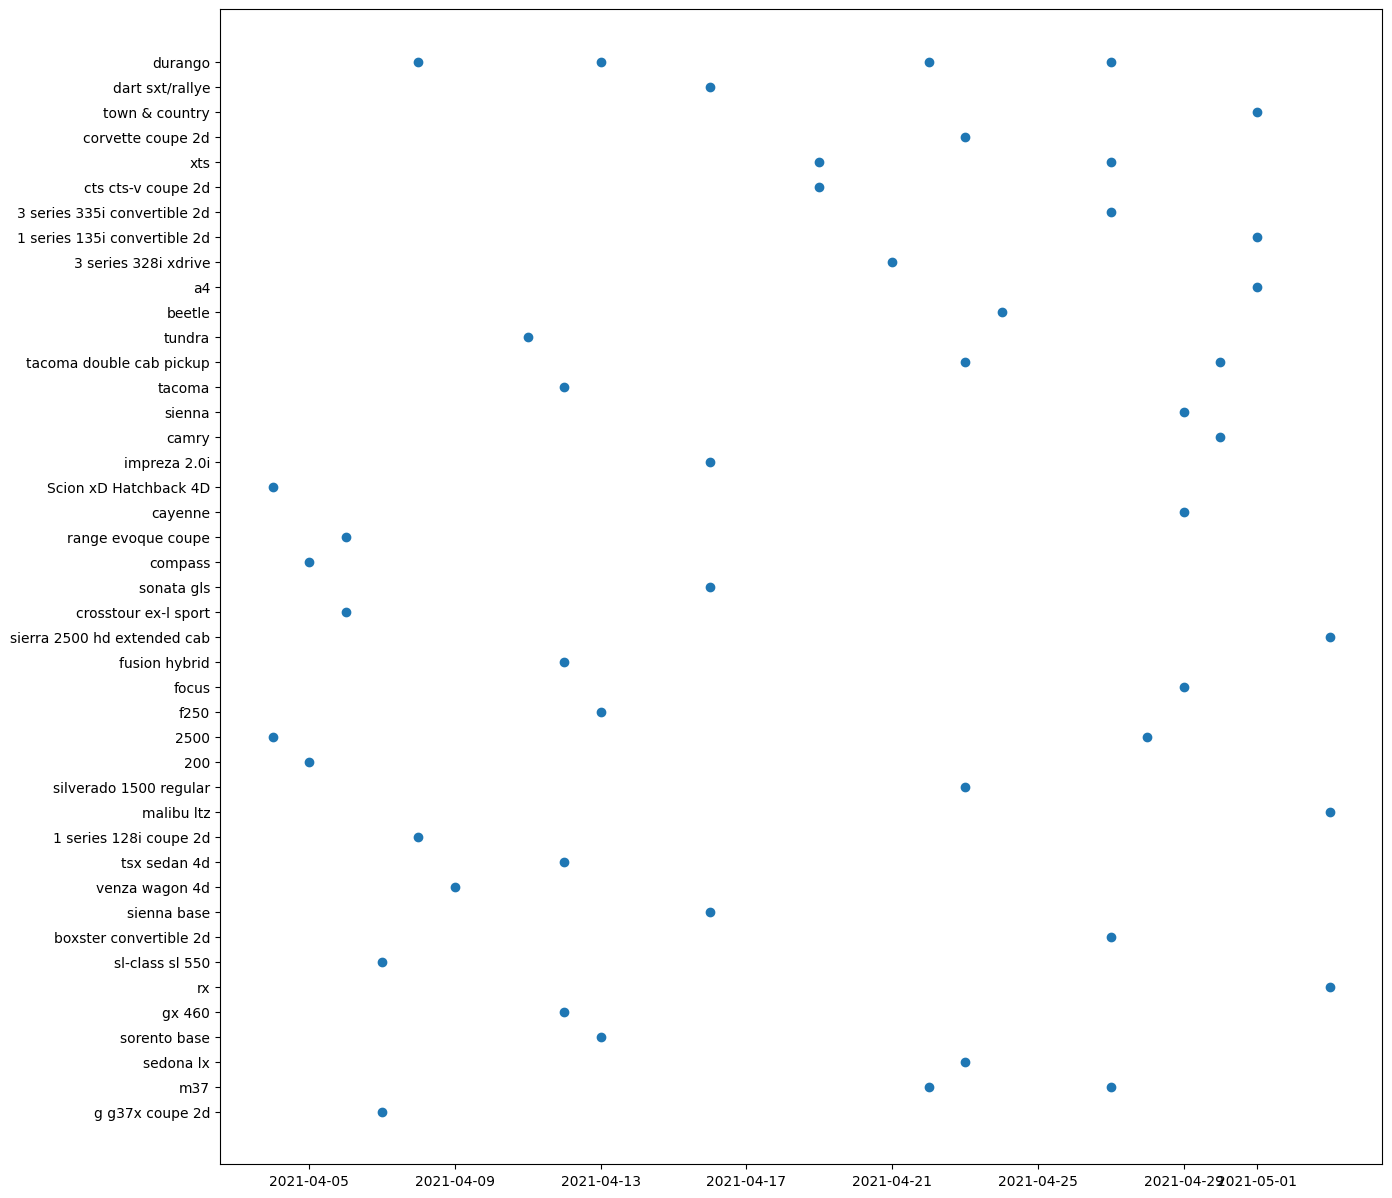

In [8]:
plt.figure(figsize=(15,15))
plt.scatter(df.iloc[300:350].index,df.iloc[300:350]["model"])
plt.show()